In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("medical_examination.csv")

In [3]:
df["BMI"] = df["weight"]/((df["height"]*0.01)**2)
df["overweight"] = [1 if x > 25 else 0 for x in df["BMI"]]
df["gluc"] = [0 if x == 1 else 1 for x in df["gluc"]]
df["cholesterol"] = [0 if x == 1 else 1 for x in df["cholesterol"]]

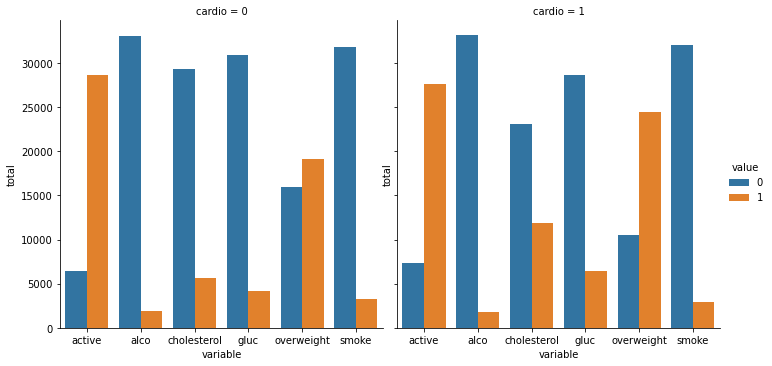

In [4]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
sns.catplot(data = df_cat, kind='count',  x='variable', hue='value', col='cardio').set(ylabel = 'total')

In [5]:
df = df.drop("BMI", axis = 1)

In [6]:
df = df[(df["ap_lo"] <= df["ap_hi"])&
       (df["height"] >= df["height"].quantile(0.025)) &
       (df["height"] <= df["height"].quantile(0.975)) &
       (df["weight"] >= df["weight"].quantile(0.025)) &
       (df["weight"] <= df["weight"].quantile(0.975))]

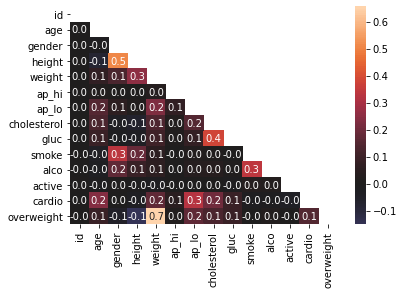

In [7]:
upper = np.triu(df.corr())
figure = sns.heatmap(df.corr(), mask = upper, annot = True,fmt = "0.1f", center = 0)